# Structure Optimization

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
from potentials import *
from distances import *
from sampling import *

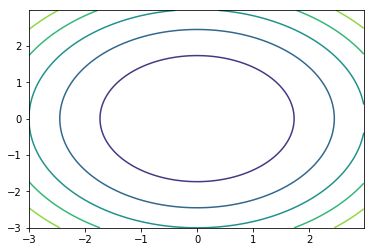

In [81]:
import matplotlib
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
XY = np.append(X[:, :, None], Y[:, :, None], axis=-1)
Z = potentials.harmonic(XY)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Simplest default with labels')

In [209]:
def descent( x, a=1e-4, maxst=1e6 ):
    step = 0
    f = gradients.harmonic( x )
    x1 = x - a * f
    while(step < maxst and (abs(x[-1] - x1) > 1e-10).all()):
        x = np.append(x[None, :, :], x1[None, :, :], axis=0)
        f = gradients.harmonic( x[-1] )
        x1 = x[-1] - a * f
        step += 1
    return x1, step

In [210]:
xinit = np.array([[1., 1], [-1, 2]])
for i in range(1,5):
    print(descent(xinit, 10 ** (-i)))

ValueError: all the input arrays must have same number of dimensions

In [238]:
#print(xinit)
#print(xinit[None, :, :])
x = xinit

In [239]:
x1 = x * 0.5
print(x1)
x = np.append(x[None, :, :], x1[None, :, :], axis=0)
print(x)
print(x[-1])

[[ 0.5  0.5]
 [-0.5  1. ]]
[[[ 1.   1. ]
  [-1.   2. ]]

 [[ 0.5  0.5]
  [-0.5  1. ]]]
[[ 0.5  0.5]
 [-0.5  1. ]]


In [242]:
x1 = x[-1] * 0.5
print(x1)
x = np.append(x,  x1[None, :, :], axis=0)
print(x)

[[ 0.0625  0.0625]
 [-0.0625  0.125 ]]
[[[ 1.      1.    ]
  [-1.      2.    ]]

 [[ 0.5     0.5   ]
  [-0.5     1.    ]]

 [[ 0.25    0.25  ]
  [-0.25    0.5   ]]

 [[ 0.125   0.125 ]
  [-0.125   0.25  ]]

 [[ 0.0625  0.0625]
  [-0.0625  0.125 ]]]


In [248]:
def descent( x, a=1e-4, prec=1e-10, maxst=1e6 ):
    """Gradient Descent
    
    Arguments:
        x    (float): position vectors (dim = n x 3)
        a    (float): 'learning rate' alpha = 1e-4
        prec (float): difference between steps, precision = 1e-10
        maxst  (int): max # of steps, maxst = 1e6
    
    Output:
        x: position array,
        step: # of steps needed to converge"""
    
    x = x[None, :, :]
    step = 0
    f = gradients.harmonic( x[-1] )
    x1 = x[-1] - a * f
    
    while(step < maxst and (abs(x[-1] - x1) > prec).all()):
        x = np.append(x, x1[None, :, :], axis=0)
        f = gradients.harmonic( x[-1] )
        x1 = x[-1] - a * f
        step += 1
        
    return x, step

In [257]:
xinit = np.array([[1., 1], [-1, 2]])
#for i in range(1,4):
#    print(descent(xinit, 10 ** (-i)))
x_history, nsteps = descent(xinit, 1e-3)

In [258]:
print(nsteps, x_history)

16111 [[[ 1.00000000e+00  1.00000000e+00]
  [-1.00000000e+00  2.00000000e+00]]

 [[ 9.99000000e-01  9.99000000e-01]
  [-9.99000000e-01  1.99800000e+00]]

 [[ 9.98001000e-01  9.98001000e-01]
  [-9.98001000e-01  1.99600200e+00]]

 ...

 [[ 1.00103631e-07  1.00103631e-07]
  [-1.00103631e-07  2.00207263e-07]]

 [[ 1.00003528e-07  1.00003528e-07]
  [-1.00003528e-07  2.00007056e-07]]

 [[ 9.99035242e-08  9.99035242e-08]
  [-9.99035242e-08  1.99807048e-07]]]
